#### SUPPORT VECTOR MACHINE (SVM)

#### What are Support Vector Machines (SVMs)?
👉 SVM is a supervised machine learning algorithm that works on both classification and regression problem statements.

👉 For classification problem statements, it tries to differentiate data points of different classes by finding a hyperplane that maximizes the margin between the classes in the training data.

👉 In simple words, SVM tries to choose the hyperplane which separates the data points as widely as possible since this margin maximization improves the model’s accuracy on the test or the unseen data.


#### What are Support Vectors in SVMs?
👉 Support vectors are those instances that are located on the margin itself. For SVMS, the decision boundary is entirely determined by using only the support vectors.

👉 Any instance that is not a support vector (not on the margin boundaries) has no influence whatsoever; you could remove them or add more instances, or move them around, and as long as they stay off the margin they won’t affect the decision boundary.

👉 For computing the predictions, only the support vectors are involved, not the whole training set.

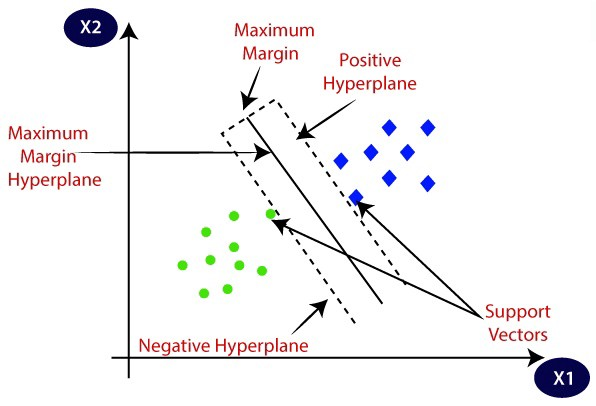

#### What are Support Vectors in SVMs?
👉 Support vectors are those instances that are located on the margin itself. For SVMS, the decision boundary is entirely determined by using only the support vectors.

👉 Any instance that is not a support vector (not on the margin boundaries) has no influence whatsoever; you could remove them or add more instances, or move them around, and as long as they stay off the margin they won’t affect the decision boundary.

👉 For computing the predictions, only the support vectors are involved, not the whole training set.

#### What are hard margin and soft Margin SVMs?
👉  Hard margin SVMs work only if the data is linearly separable and these types of SVMs are quite sensitive to the outliers.

👉  But our main objective is to find a good balance between keeping the margins as large as possible and limiting the margin violation i.e. instances that end up in the middle of margin or even on the wrong side, and this method is called soft margin SVM.

#### What is a slack variable?
👉 To meet the soft margin objective, we need to introduce a slack variable ε>=0 for each sample; it measures how much any particular instance is allowed to violate the margin.

👉 Here thing becomes little complex as we have conflicting objectives of making the slack variables as small as possible to reduce margin violation and make w (weight matrix) as small as possible to increase the margin. This is where the role of the C hyperparameter comes which allows us to define the trade-off between these two objectives.

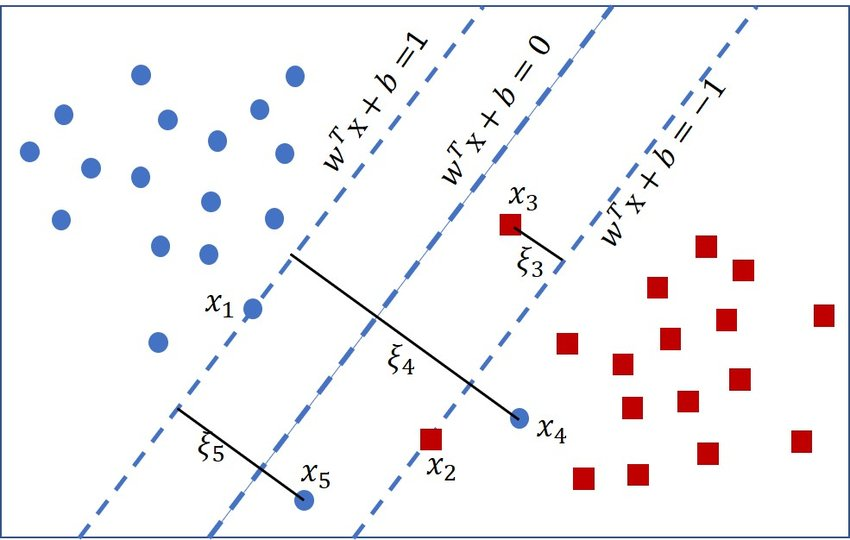

#### What is the role of the C hyper-parameter in SVM? Does it affect the bias/variance trade-off?
👉 The balance between keeping the margins as large as possible and limiting the margin violation is controlled by the C parameter: a small value leads to a wider street but more margin violation and a higher value of C makes fewer margin violations but ends up with a smaller margin and overfitting.

👉 Here thing becomes a little complex as we have conflicting objectives of making the slack variables as small as possible to reduce margin violation and make W as small as possible to increase the margin. This is where the role of the C hyperparameter comes in which allows us to define the trade-off between these two objectives.

#### What is the “Kernel trick”?
👉 A Kernel is a function capable of computing the dot product of instances mapped in higher dimension space without actually transforming all the instances into the higher feature space and calculating the dot product.

👉 This trick makes the whole process much less computationally expensive than that actual transformation to calculate the dot product and this is the essence of the kernel trick.

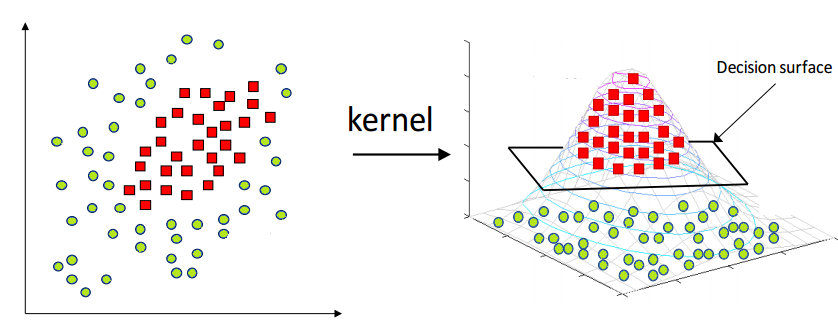

#### Explain different types of kernel functions.
A function is called kernel if there exist a function ϕ that maps a and b into another space such that K(a, b) = ϕ(a)T · ϕ(b). So you can use K as a kernel since you just know that a mapping ϕ exists, even if you don’t know what ϕ function is. These are the very good things about kernels.

Some of the kernel functions are as follows:

👉 Polynomial Kernel: These are the kernel functions that represent the similarity of vectors in a feature space over polynomials of original variables.

👉 Gaussian Radial Basis Function (RBF) kernel:  Gaussian RBF kernel maps each training instance to an infinite-dimensional space, therefore it’s a good thing that you don’t need to perform the mapping.

#### Is SVM sensitive to the Feature Scaling?
Yes, SVMs are sensitive to feature scaling as it takes input data to find the margins around hyperplanes and gets biased for the variance in high values.

#### IMPORT REQUIRED LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### IMOPRT DATASET

In [2]:
bankdata = pd.read_csv("bill_authentication.csv")

In [3]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bankdata.shape

(1372, 5)

In [12]:
bankdata.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [51]:
bankdata.Class.unique()

array([0, 1], dtype=int64)

#### CHECK OUTLIERS

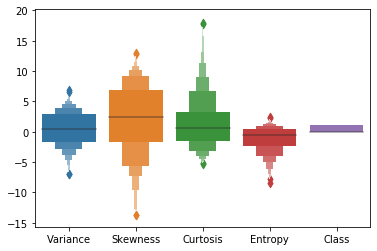

In [16]:
import seaborn as sns
sns.boxenplot(data = bankdata)

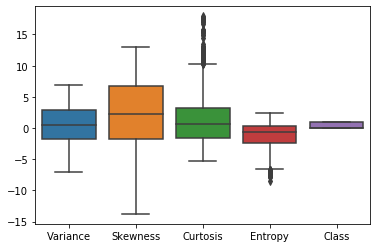

In [19]:
import seaborn as sns
sns.bo

#### OUTLIER ELIMINATION

import pandas as pd
import numpy as np                                     

cols = df.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = df.loc[:, cols]


OPTION 1: z-score filter: z-score < 3

lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

OPTION 2: quantile filter: discard 1% upper / lower values

lim = np.logical_or(df_sub < df_sub.quantile(0.99, numeric_only=False),
                    df_sub > df_sub.quantile(0.01, numeric_only=False))

OPTION 3: iqr filter: within 2.22 IQR (equiv. to z-score < 3)

iqr = df_sub.quantile(0.75, numeric_only=False) - df_sub.quantile(0.25, numeric_only=False)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22


replace outliers with nan
df.loc[:, cols] = df_sub.where(lim, np.nan)

#### CREATE X & y Variable

In [21]:
X = bankdata.drop('Class', axis = 1)
y = bankdata['Class']

#### CREATE TRAIN & TEST SET

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

----

## CREATE MODELS WITH DIFFERENT KERNELS

----

#### SVC w/ LINEAR KERNEL

In [75]:
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(X_train, y_train)

y_pred = svc_linear.predict(X_test)

#### CREATE CONFUSION MATRIX
#### CHECK --> ACCURACY | PRECISION | RECALL | F1-SCORE | SUPPORT

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141   3]
 [  1 130]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       144
           1       0.98      0.99      0.98       131

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



#### CREATE AUC-ROC CURVE - LINEAR KERNEL

In [78]:
y_train_pred = svc_linear.decision_function(X_train)    
y_test_pred = svc_linear.decision_function(X_test)

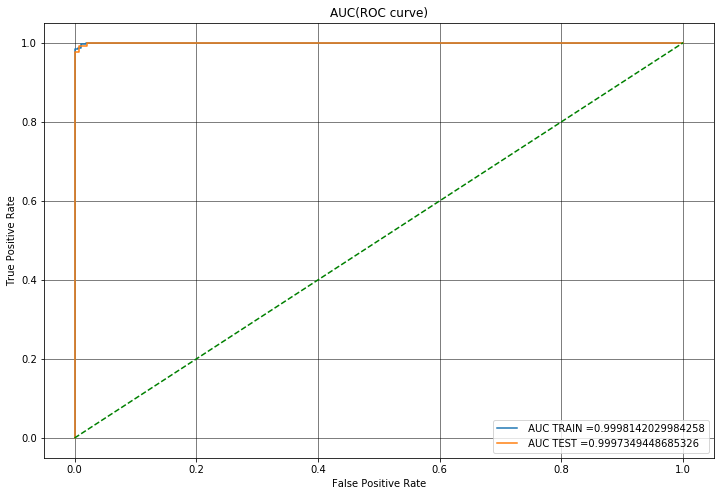

In [79]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

---------

#### SVC w/ SGDClassifier KERNEL

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc

In [83]:
svc_SGD = SGDClassifier(loss = 'hinge', class_weight = 'balanced')
svc_SGD.fit(X_train, y_train)

y_pred_SGD = svc_SGD.predict(X_test)

#### CREATE CONFUSION MATRIX
#### CHECK --> ACCURACY | PRECISION | RECALL | F1-SCORE | SUPPORT

In [84]:
print(confusion_matrix(y_test, y_pred_SGD))
print(classification_report(y_test, y_pred_SGD))

[[141   3]
 [  0 131]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       131

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



#### CREATE AUC-ROC CURVE - SGDClassifier KERNEL

In [87]:
y_train_pred = svc_SGD.decision_function(X_train)    
y_test_pred = svc_SGD.decision_function(X_test) 

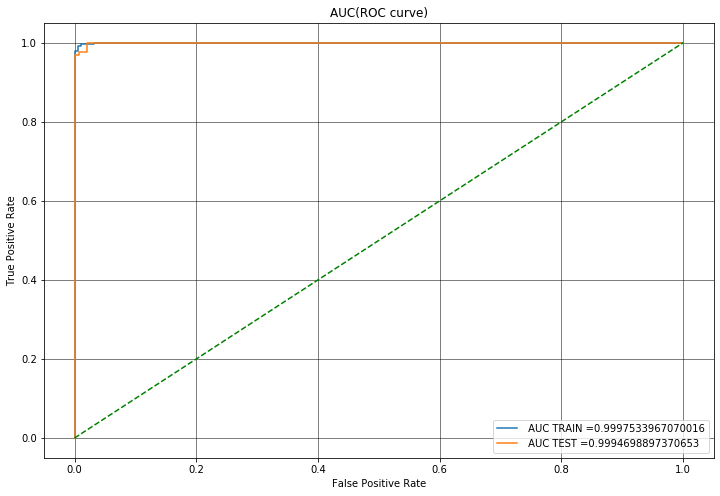

In [88]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

---

#### SVC w/ POLYNOMIAL KERNEL

In [89]:
svc_poly = SVC(kernel = 'poly', degree = 8)
svc_poly.fit(X_train, y_train)

y_pred_poly = svc_poly.predict(X_test)

#### CREATE CONFUSION MATRIX
#### CHECK --> ACCURACY | PRECISION | RECALL | F1-SCORE | SUPPORT

In [90]:
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

[[ 93  51]
 [  0 131]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.78       144
           1       0.72      1.00      0.84       131

    accuracy                           0.81       275
   macro avg       0.86      0.82      0.81       275
weighted avg       0.87      0.81      0.81       275



#### CREATE AUC-ROC CURVE - POLY KERNEL

In [91]:
y_train_pred = svc_poly.decision_function(X_train)    
y_test_pred = svc_poly.decision_function(X_test) 

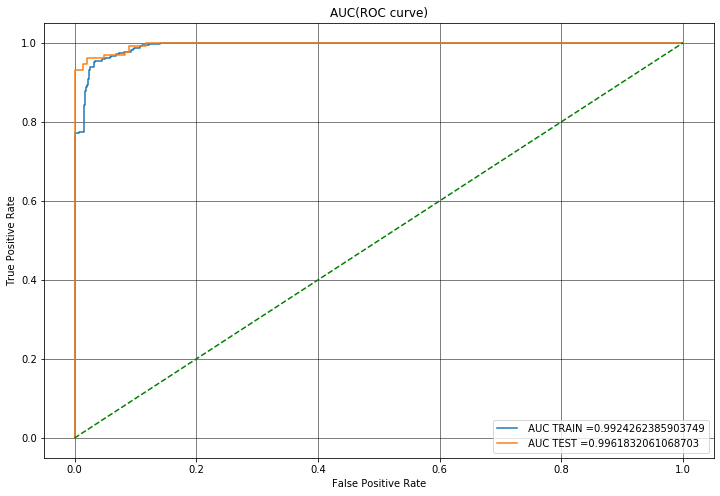

In [92]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

---

#### SVC w/ RBF KERNEL

In [93]:
svc_rbf = SVC(kernel = 'rbf', degree = 8)
svc_rbf.fit(X_train, y_train)

y_pred_rbf = svc_rbf.predict(X_test)

#### CREATE CONFUSION MATRIX
#### CHECK --> ACCURACY | PRECISION | RECALL | F1-SCORE | SUPPORT

In [94]:
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

[[144   0]
 [  0 131]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       131

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



#### CREATE AUC-ROC CURVE - RBF KERNEL

In [95]:
y_train_pred = svc_rbf.decision_function(X_train)    
y_test_pred = svc_rbf.decision_function(X_test) 

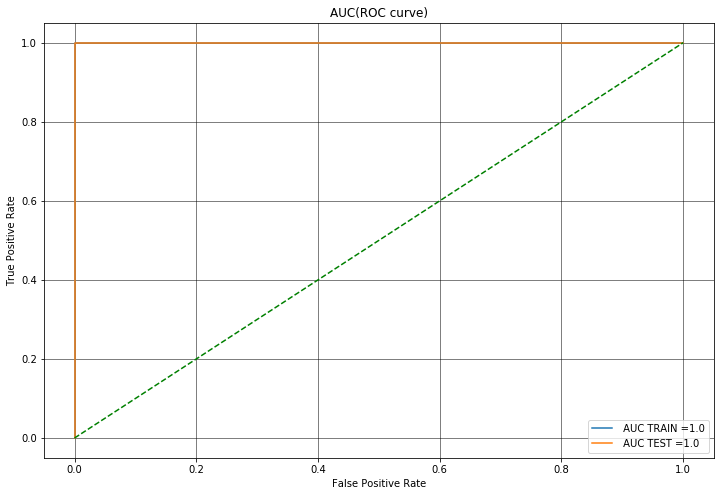

In [96]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

---

#### SVC w/ SIGMOID KERNEL

In [97]:
svc_sigmoid = SVC(kernel = 'sigmoid', degree = 100, C = 100, gamma = 100)
svc_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = svc_sigmoid.predict(X_test)

#### CREATE CONFUSION MATRIX
#### CHECK --> ACCURACY | PRECISION | RECALL | F1-SCORE | SUPPORT

In [98]:
print(confusion_matrix(y_test, y_pred_sigmoid))
print(classification_report(y_test, y_pred_sigmoid))

[[91 53]
 [60 71]]
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       144
           1       0.57      0.54      0.56       131

    accuracy                           0.59       275
   macro avg       0.59      0.59      0.59       275
weighted avg       0.59      0.59      0.59       275



#### CREATE AUC-ROC CURVE - RBF KERNEL

In [99]:
y_train_pred = svc_sigmoid.decision_function(X_train)    
y_test_pred = svc_sigmoid.decision_function(X_test)

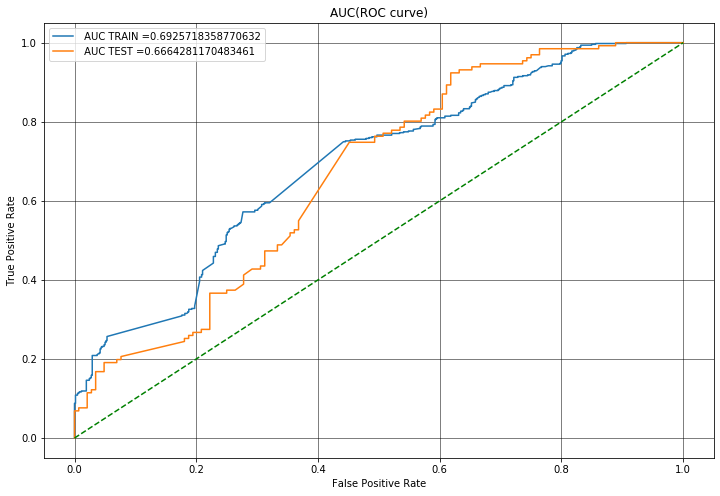

In [100]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()